# FINAL

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

## 1. DATA DESCRIPTION AND PREPARATION

### Loading the dataset from the provided Kaggle source

In [3]:
df = pd.read_csv('ai_jobs.csv')

### Data Cleaning: Removing nulls and creating an average salary feature

In [4]:
df.dropna(inplace=True)
df['salary_avg_usd'] = (df['salary_min_usd'] + df['salary_max_usd']) / 2

## 2. EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
print(df.describe())

       min_experience_years  salary_min_usd  salary_max_usd   posted_year  \
count          50000.000000    50000.000000    50000.000000  50000.000000   
mean               2.335500   100871.434320   120858.350740   2022.996360   
std                2.054172    37043.446641    37531.386484      2.001286   
min                0.000000    50000.000000    65000.000000   2020.000000   
25%                0.000000    61287.000000    83739.000000   2021.000000   
50%                2.000000    97505.000000   117604.000000   2023.000000   
75%                5.000000   143730.500000   161348.750000   2025.000000   
max                5.000000   154999.000000   180000.000000   2026.000000   

       salary_avg_usd  
count    50000.000000  
mean    110864.892530  
std      37049.338755  
min      57607.500000  
25%      70673.875000  
50%     107565.250000  
75%     154331.750000  
max     167468.000000  


### Visualization 1: Distribution of average salaries

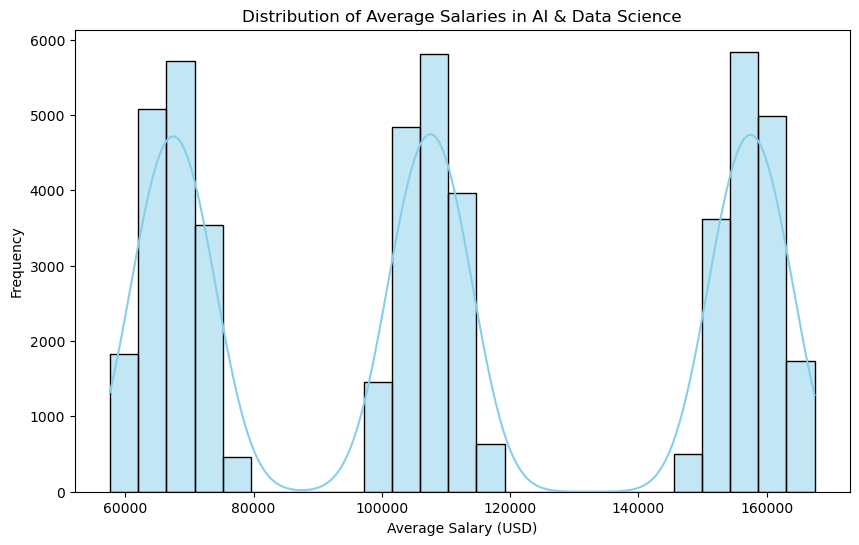

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_avg_usd'], kde=True, color='skyblue')
plt.title('Distribution of Average Salaries in AI & Data Science')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Frequency')
plt.show()

### Visualization 2: Salary distribution by experience level

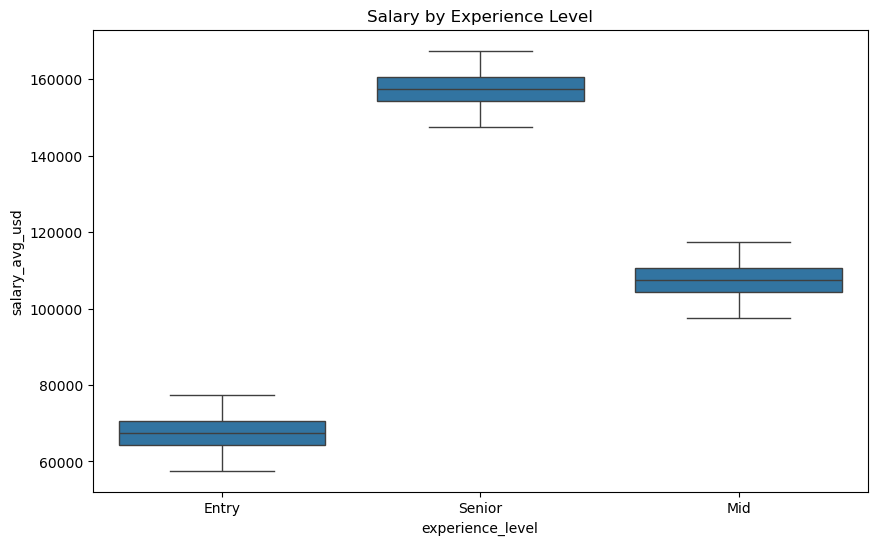

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_avg_usd', data=df)
plt.title('Salary by Experience Level')
plt.show()

### Visualization 3: Yearly salary trends

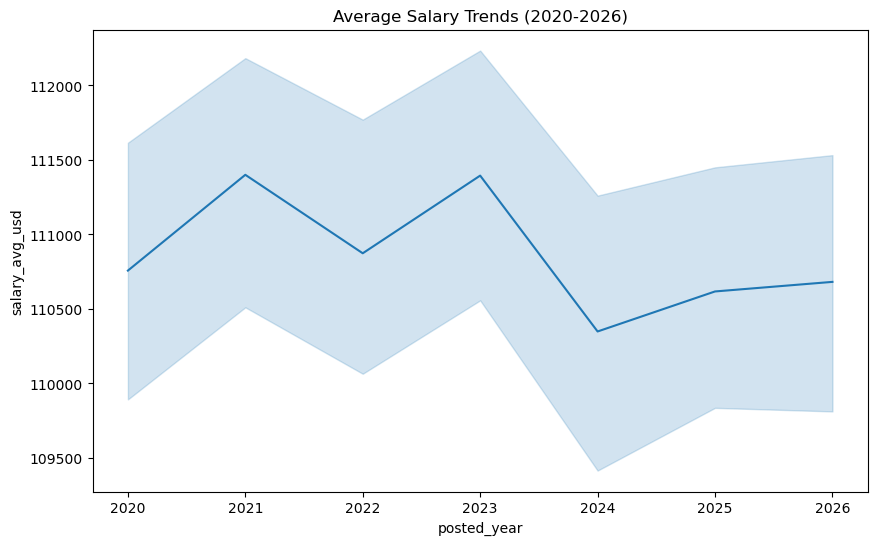

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='posted_year', y='salary_avg_usd', data=df)
plt.title('Average Salary Trends (2020-2026)')
plt.show()

## 3. STATISTICAL ANALYSIS (Required Tests)

### One-sample t-test: Testing if mean salary differs from $100,000

In [9]:
t_stat, p_val = stats.ttest_1samp(df['salary_avg_usd'], 100000)
print(f"One-sample t-test: t={t_stat:.4f}, p={p_val:.4f}")

One-sample t-test: t=65.5737, p=0.0000


### Two-sample t-test: Comparing Remote vs. Onsite salaries

In [10]:
remote_salaries = df[df['remote_type'] == 'Remote']['salary_avg_usd']
onsite_salaries = df[df['remote_type'] == 'Onsite']['salary_avg_usd']
t_stat2, p_val2 = stats.ttest_ind(remote_salaries, onsite_salaries)
print(f"Two-sample t-test: t={t_stat2:.4f}, p={p_val2:.4f}")

Two-sample t-test: t=0.9902, p=0.3221


### Paired t-test: Comparing Min vs. Max salary offered in the same postings

In [11]:
t_stat_p, p_val_p = stats.ttest_rel(df['salary_min_usd'], df['salary_max_usd'])
print(f"Paired t-test: t={t_stat_p:.4f}, p={p_val_p:.4f}")

Paired t-test: t=-530.2864, p=0.0000


### Correlation: Relationship between years of experience and salary

In [12]:
pearson_corr, p_p = stats.pearsonr(df['min_experience_years'], df['salary_avg_usd'])
spearman_corr, p_s = stats.spearmanr(df['min_experience_years'], df['salary_avg_usd'])
print(f"Pearson Correlation: {pearson_corr:.4f}, p={p_p:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}, p={p_s:.4f}")

Pearson Correlation: 0.9923, p=0.0000
Spearman Correlation: 0.9428, p=0.0000


In [13]:
model_anova = ols('salary_avg_usd ~ C(company_type)', data=df).fit()
anova_table = sm.stats.anova_lm(model_anova, typ=2)
print("\nOne-way ANOVA results:")
print(anova_table)


One-way ANOVA results:
                       sum_sq       df         F   PR(>F)
C(company_type)  6.645476e+09      2.0  2.420805  0.08886
Residual         6.862466e+13  49997.0       NaN      NaN


## 4. REGRESSION ANALYSIS

### Simple Linear Regression: Predicting salary based on years of experience

In [14]:
X_simple = sm.add_constant(df['min_experience_years'])
model_simple = sm.OLS(df['salary_avg_usd'], X_simple).fit()
print("\nSimple Linear Regression Summary:")
print(model_simple.summary())


Simple Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:         salary_avg_usd   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 3.190e+06
Date:                Tue, 03 Feb 2026   Prob (F-statistic):               0.00
Time:                        17:13:23   Log-Likelihood:            -4.9267e+05
No. Observations:               50000   AIC:                         9.853e+05
Df Residuals:                   49998   BIC:                         9.854e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

### Multiple Linear Regression: Predictors include Experience, Year, and Work Type

In [15]:
df_encoded = pd.get_dummies(df, columns=['remote_type'], drop_first=True)
# Using at least 3 predictors as required by instructions
predictors = ['min_experience_years', 'posted_year', 'remote_type_Remote']
X_mult = sm.add_constant(df_encoded[predictors].astype(float))
model_multiple = sm.OLS(df_encoded['salary_avg_usd'], X_mult).fit()

In [16]:
print("\nMultiple Linear Regression Summary:")
print(model_multiple.summary())


Multiple Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:         salary_avg_usd   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.063e+06
Date:                Tue, 03 Feb 2026   Prob (F-statistic):               0.00
Time:                        17:13:25   Log-Likelihood:            -4.9266e+05
No. Observations:               50000   AIC:                         9.853e+05
Df Residuals:                   49996   BIC:                         9.854e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------